In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [102]:
def cosine_distance(v1, v2):
    if len(v1.shape) == 1:
        v1 = v1[np.newaxis, :]
    if len(v2.shape) == 1:
        v2 = v2[np.newaxis, :]
    norm_v1 = np.sqrt(np.sum(v1**2, axis=1, keepdims=True))
    norm_v2 = np.sqrt(np.sum(v2**2, axis=1, keepdims=True))

    v1_copy = v1 / norm_v1
    v2_copy = v2 / norm_v2

    dot_product = v1_copy.dot(v2_copy.T)
    return 1 - dot_product

def euclidean_distance(v1, v2):
    if len(v1.shape) == 1:
        v1 = v1[np.newaxis, :]
    if len(v2.shape) == 1:
        v2 = v2[np.newaxis, :]
    result = np.zeros(shape=(v1.shape[0], v2.shape[0]))
    for i in range(v1.shape[0]):
        for j in range(v2.shape[0]):
            result[i, j] = np.sqrt(np.sum((v1[i] - v2[j])**2))
    return result

In [103]:
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances

vec1 = np.random.normal(size=(20, 100))
vec2 = np.random.normal(size=(10, 100))

print(np.allclose(cosine_distance(vec1, vec2), cosine_distances(vec1, vec2)))
print(np.allclose(euclidean_distance(vec1, vec2), euclidean_distances(vec1, vec2)))

True
True


In [133]:
def average_linkage(cluster1, cluster2):
    return np.mean([euclidean_distance(v1, v2) for v1 in cluster1 for v2 in cluster2])

In [134]:
def agglomerative_clustering(data):
    clusters = [[point] for point in data.copy()]  # в начале каждая точка является кластером
    cluster_history = []  # запишем сюда историю слияний кластеров

    while len(clusters) > 1:  # до тех пор, пока все точки не соберутся в один кластер
        # считаем расстояния между кластерами, записываем их индексы и расстояние
        distances = [(i, j, average_linkage(clusters[i], clusters[j])) for i in range(len(clusters)) for j in range(i+1, len(clusters))]

        # находим минимальное расстояние между двумя кластерами
        i, j, dist = min(distances, key=lambda x: x[2])
        cluster_history.append((dist, clusters.copy()))  # запишем историю слияний

        # соединяем 2 ближайших кластера в один
        clusters[i] = clusters[i] + clusters[j]

        # удаляем кластер, который присоединили
        del clusters[j]
    return cluster_history

In [135]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=100, centers=5, cluster_std=0.6)

In [136]:
# x /= np.linalg.norm(x, axis=1, keepdims=True)

In [137]:
clusters = agglomerative_clustering(x)

In [138]:
distances = np.array([c[0] for c in clusters])

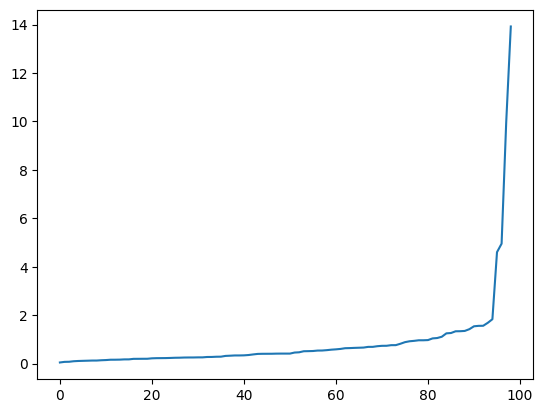

In [139]:
plt.plot(distances);

In [141]:
np.where(distances > 3)[0]

array([95, 96, 97, 98], dtype=int64)

In [142]:
cl = clusters[95][1]

In [143]:
len(cl)  # 4 кластера с такой отсечкой

5

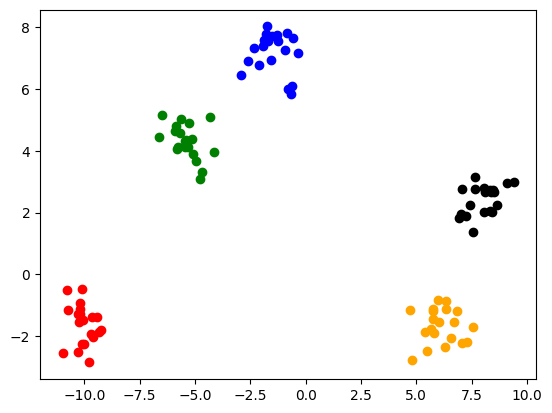

In [144]:
colors = ['red', 'green', 'blue', 'orange', 'black']
for i, cluster in enumerate(cl):
    for point in cluster:
        plt.scatter(point[0], point[1], color=colors[i])

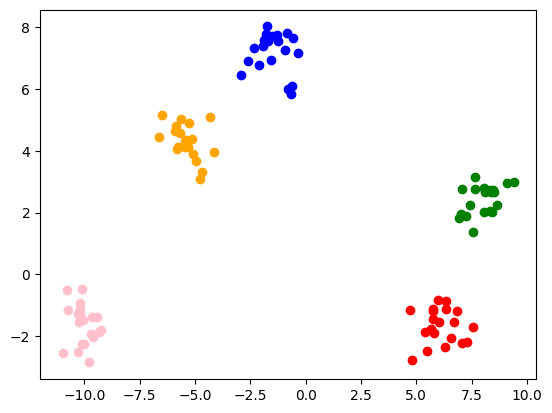

In [145]:
colors = ['red', 'green', 'blue', 'orange', 'pink']
for point, target in zip(x, y):
    plt.scatter(point[0], point[1], color=colors[target])

In [146]:
from sklearn.cluster import AgglomerativeClustering

aggcl = AgglomerativeClustering(n_clusters=None, metric='euclidean', linkage='average', distance_threshold=3, compute_distances=True)

In [147]:
cl2 = aggcl.fit_predict(x)

In [148]:
np.allclose(aggcl.distances_, distances)

True

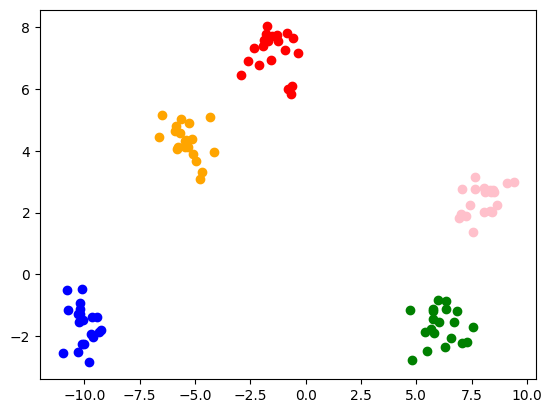

In [149]:
for point_i in range(x.shape[0]):
    plt.scatter(x[point_i][0], x[point_i][1], color=colors[cl2[point_i]])